In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('car_purchasing.csv', encoding= 'ISO-8859-1')

In [3]:
car_df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [5]:
car_df.sample(5)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
125,Rigel Craft,diam.eu.dolor@Proin.com,Liechtenstein,0,50.757255,61809.07451,2620.079459,407733.5229,47143.44008
272,Leila F. Hubbard,ultrices.posuere.cubilia@magnisdis.com,Samoa,1,45.194794,74173.39239,11315.596260,521404.2386,52709.08196
394,"Chaney, Reuben I.",Integer@vulputate.net,Saint Pierre and Miquelon,0,61.034245,61824.87980,11211.995020,660897.0146,63140.05082
77,Adria Mathis,Aliquam.rutrum.lorem@Donec.net,Guinea,1,56.519529,53450.90036,8740.723093,309113.0627,44434.71917
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342


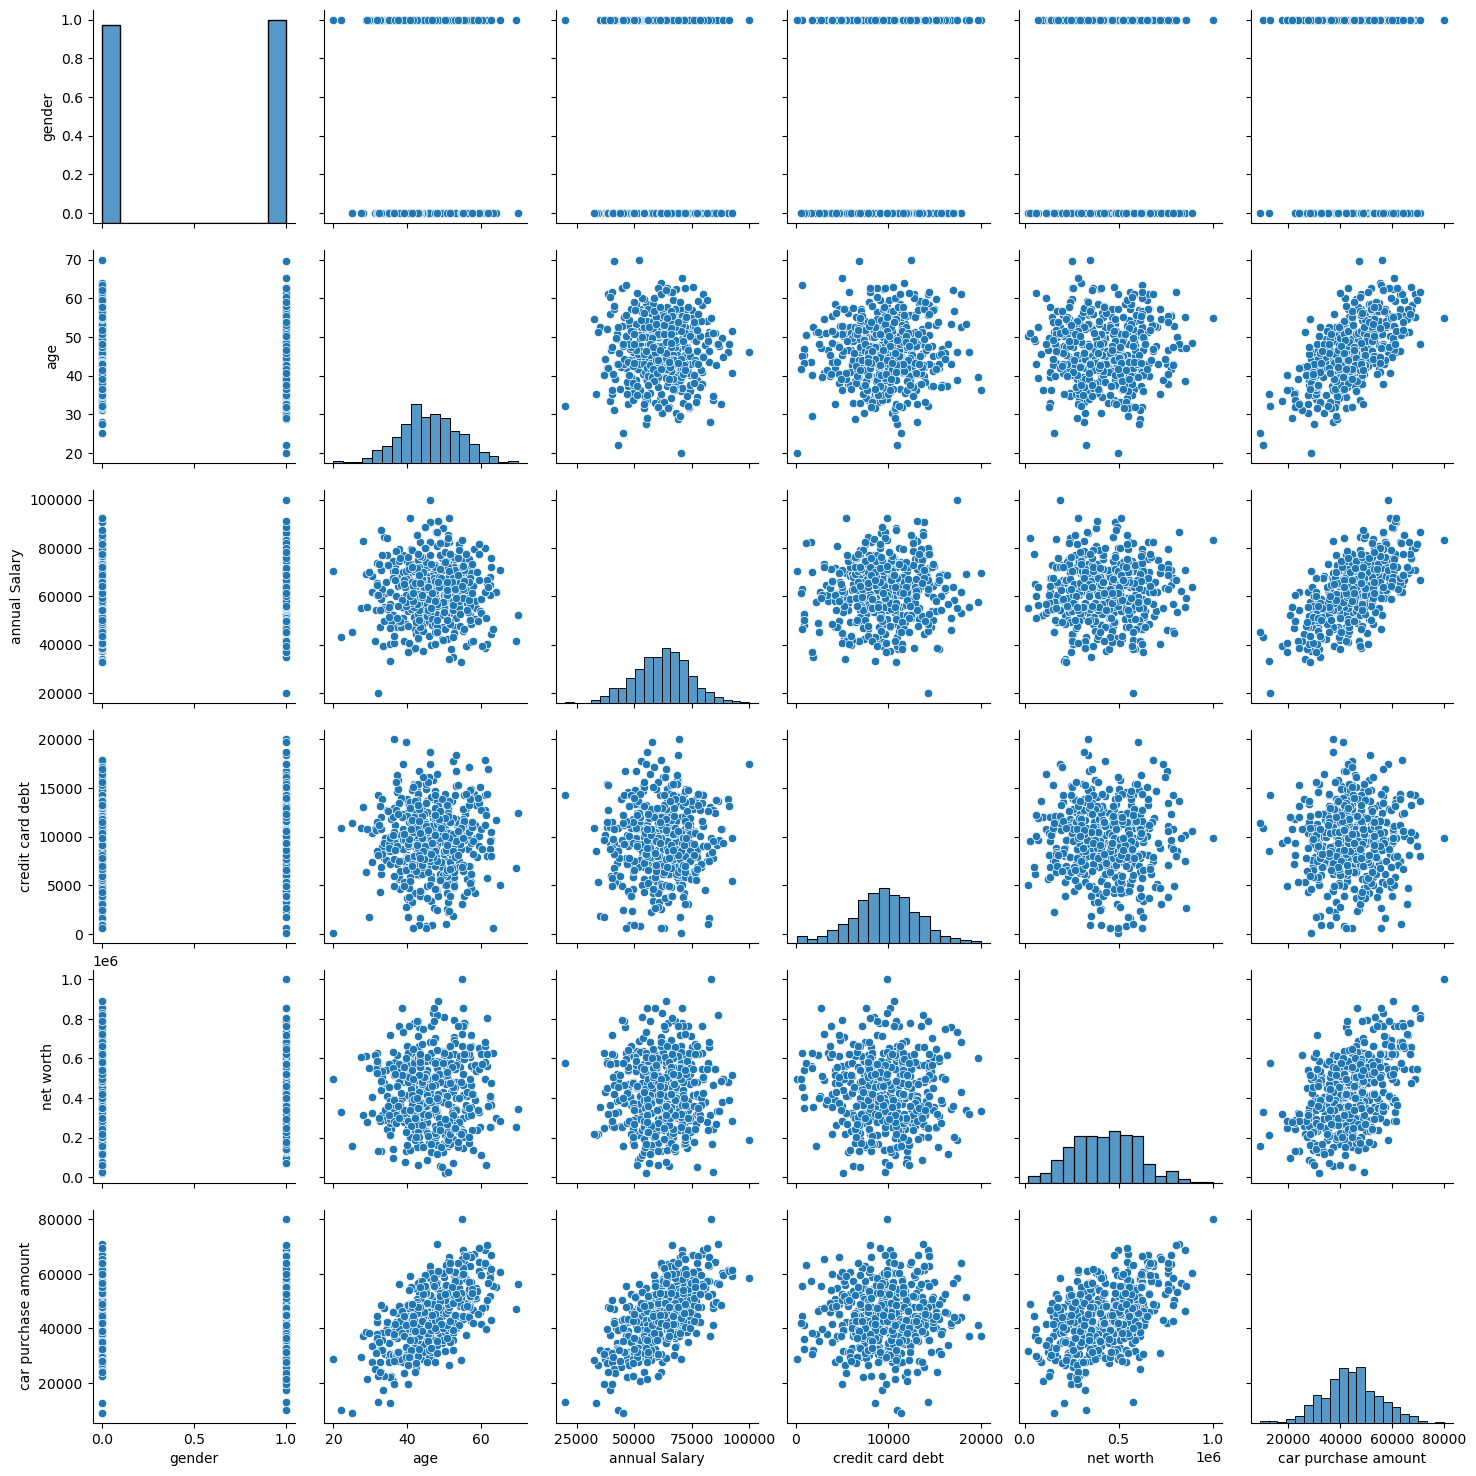

In [6]:
sns.pairplot(car_df)

In [7]:
X = car_df.drop(['customer name', 'customer e-mail', 'country', 'car purchase amount'], axis= 1)

In [8]:
X.sample()

,gender,age,annual Salary,credit card debt,net worth
71,0,56.215752,57393.82872,5627.803654,411831.0371


In [9]:
y = car_df['car purchase amount']

In [10]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [13]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [14]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [15]:
y = y.values.reshape(-1, 1)

In [16]:
y_scaled = scaler.fit_transform(y)

In [17]:
y_scaled[1]

array([0.50866938])

In [18]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size= 0.3)

In [20]:
print(f'The shape of Data: {car_df.shape}')
print(f'The shape of Train Data: {X_train.shape}')
print(f'The shape of Test Data: {X_test.shape}')

The shape of Data: (500, 9)
The shape of Train Data: (350, 5)
The shape of Test Data: (150, 5)


In [21]:
X_test

array([[0.        , 0.47252127, 0.78216264, 0.08025074, 0.55367864],
       [0.        , 0.46182945, 0.67613141, 0.54159257, 0.20986748],
       [0.        , 0.25592997, 0.84497519, 0.53842106, 0.47506504],
       [0.        , 0.63050653, 0.35933396, 0.19213101, 0.20121266],
       [0.        , 0.42709004, 0.73831195, 0.35787272, 0.3529301 ],
       [1.        , 0.50682579, 0.52553958, 0.24525971, 0.34452963],
       [0.        , 0.40843091, 0.62564925, 0.23122192, 0.605823  ],
       [1.        , 0.54887807, 0.66370637, 0.53486397, 0.18002218],
       [1.        , 0.44451781, 0.45123135, 0.58167261, 0.30635576],
       [1.        , 0.46259097, 0.42795776, 0.36056858, 0.42086483],
       [1.        , 0.36211895, 0.37077459, 0.2301227 , 0.3629124 ],
       [1.        , 0.62062513, 0.79532885, 0.42003768, 0.1500322 ],
       [0.        , 0.47085056, 0.56705079, 0.3889153 , 0.57106204],
       [0.        , 0.48554838, 0.62787694, 0.42422207, 0.30665891],
       [1.        , 0.55936263, 0.

In [22]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [24]:
model = Sequential()
model.add(Dense(units= 25, input_dim= 5, activation= 'relu'))
model.add(Dense(units= 25, activation= 'relu'))
model.add(Dense(units= 1, activation= 'linear'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [27]:
epochs_hist = model.fit(X_train, y_train, 
                        epochs= 100, batch_size= 25, 
                        validation_split= 0.2)

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 0.5550 - val_loss: 0.3483
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1961 - val_loss: 0.1087
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0519 - val_loss: 0.0349
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0217 - val_loss: 0.0272
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0184 - val_loss: 0.0204
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.0128 - val_loss: 0.0164
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0103 - val_loss: 0.0140
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0088 - val_loss: 0.0117
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0101
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 0.0072 - val_loss: 0.0094
Epoch

In [28]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

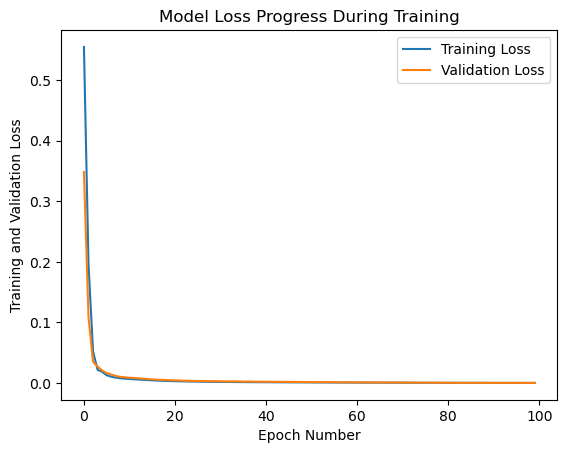

In [29]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()